# Power Line Detection via Background Noise Removal for Colorful Images

https://www.tensorflow.org/tutorials/images/classification

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir(r"C:\Users\VArri\Documents\PowerLines\images\visuel\color_version\cropped")
print(os.getcwd())
path = os.getcwd()

C:\Users\VArri\Documents\PowerLines\images\visuel\color_version\cropped


## Creation du dataset avec les contours annotés de la Power Line Detection 

In [3]:
img_height = 28
img_width = 28
batch_size = 32

# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory
# https://www.youtube.com/watch?v=q7ZuZ8ZOErE
# requires Tensorflow 2.3, hence Python >=3.7 to use keras.preprocessing.image_dataset_from_directory()

ds_train = keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\VArri\Documents\PowerLines\images\visuel\color_version\cropped", 
    labels='inferred',
    label_mode = "binary",
    color_mode = "rgb",
    batch_size = batch_size,
    image_size = (img_height, img_width),
    shuffle = True, 
    seed=123,
    validation_split = 0.2,
    subset = "training",
)

ds_validation = keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\VArri\Documents\PowerLines\images\visuel\color_version\cropped", 
    labels='inferred',
    label_mode = "binary",
    color_mode = "rgb",
    batch_size = batch_size,
    image_size = (img_height, img_width),
    shuffle = True, 
    seed=123,
    validation_split = 0.2,
    subset = "validation",
)

Found 2034 files belonging to 2 classes.
Using 1628 files for training.
Found 2034 files belonging to 2 classes.
Using 406 files for validation.


In [4]:
class_names = ds_train.class_names
print(class_names)

['0', '1']


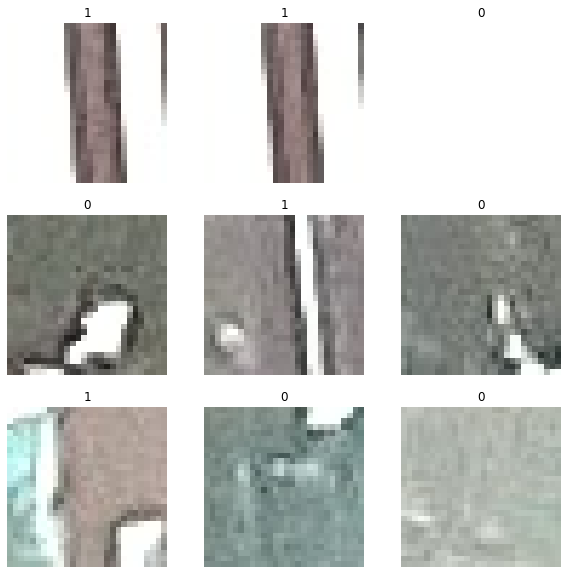

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

## D) CNN classifier

In [6]:
model = keras.models.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=[28,28,3]),
    keras.layers.Conv2D(6, kernel_size=5, strides=1, padding="valid", activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(12, kernel_size=5, strides=1, padding="valid", activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(192),
    keras.layers.Dense(2, activation="softmax")
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 12)          1812      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 12)          0         
_________________________________________________________________
flatten (Flatten)            (None, 192)               0         
_________________________________________________________________
dense (Dense)                (None, 192)               3

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.005),
              metrics=['accuracy'])

In [9]:
epochs=20
history = model.fit(
    ds_train, batch_size=32, epochs=epochs, verbose=1,
    validation_data=ds_validation, shuffle=True,
)

# GITHUB ISSUE https://github.com/tensorflow/tensorflow/issues/13044 

Epoch 1/20
51/51 [==============================] - 12s 236ms/step - loss: 0.7135 - accuracy: 0.4889 - val_loss: 0.6931 - val_accuracy: 0.5172
Epoch 2/20
51/51 [==============================] - 2s 38ms/step - loss: 0.6931 - accuracy: 0.4988 - val_loss: 0.6931 - val_accuracy: 0.5172
Epoch 3/20
51/51 [==============================] - 2s 38ms/step - loss: 0.6931 - accuracy: 0.4988 - val_loss: 0.6931 - val_accuracy: 0.5172
Epoch 4/20
51/51 [==============================] - 2s 38ms/step - loss: 0.6931 - accuracy: 0.4988 - val_loss: 0.6931 - val_accuracy: 0.5172
Epoch 5/20
51/51 [==============================] - 2s 38ms/step - loss: 0.6931 - accuracy: 0.4988 - val_loss: 0.6931 - val_accuracy: 0.5172
Epoch 6/20
51/51 [==============================] - 2s 38ms/step - loss: 0.6931 - accuracy: 0.4988 - val_loss: 0.6931 - val_accuracy: 0.5172
Epoch 7/20
51/51 [==============================] - 2s 37ms/step - loss: 0.6931 - accuracy: 0.4988 - val_loss: 0.6931 - val_accuracy: 0.5172
Epoch 8/20


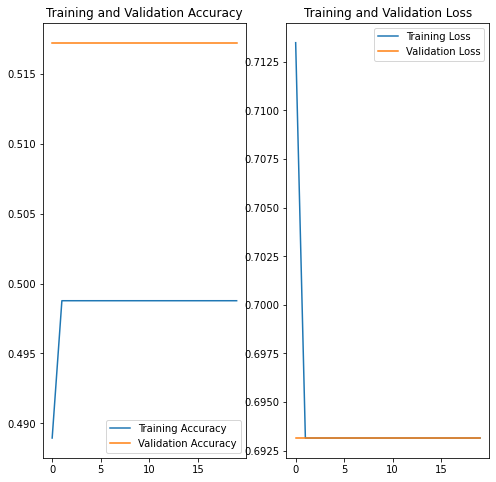

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Validation

In [11]:
ds_test = keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\VArri\Documents\PowerLines\images\visuel\color_version\cropped_test", 
    labels='inferred',
    label_mode = "binary",
    color_mode = 'rgb',
    batch_size = batch_size,
    image_size = (img_height, img_width),
    shuffle = True, 
    seed=123,
)


Found 475 files belonging to 2 classes.


In [12]:
print(ds_test.class_names)

['0', '1']


In [13]:
predict = model.predict(ds_test)

In [14]:
TP, FP, TN, FN = 0,0,0,0

y = np.concatenate([y for x, y in ds_test], axis=0)
print(len(y))

predict = np.argmax(predict, axis=1)
print(len(predict))

for i in range(len(predict)):
    if predict[i]==y[i] and predict[i]==1:
        TP+=1
    elif predict[i]==y[i] and predict[i]==0:
        TN+=1
    elif predict[i]!=y[i] and predict[i]==1:
        FP+=1
    elif predict[i]!=y[i] and predict[i]==0:
        FN+=1

acc = (TP+TN)/(TP+TN+FP+FN)
recall = TP / (TP + FN)
print('Accuracy is {} %'.format(acc*100))
print('Recall is {} %'.format(recall*100))

475
475
Accuracy is 57.89473684210527 %
Recall is 0.0 %


In [ ]:
FN

In [ ]:
TN

In [ ]:
predict

In [ ]:
os.chdir(r'C:\Users\VArri\Documents\PowerLines\images\visuel\edge')
print(os.getcwd())

In [ ]:
import cv2
import matplotlib.pyplot as plt
from random import randrange
lst = os.listdir()
img = cv2.imread(os.path.join(os.getcwd(), lst[randrange(0, len(lst))]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.figure(figsize=[10,20])
plt.imshow(img)
plt.show()

In [ ]:
gamma = 0.5
lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
res = cv2.LUT(img, lookUpTable)
plt.figure(figsize=[10,20])
plt.imshow(res)
plt.show()

In [ ]:
alpha = 1.5
lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(alpha * i, 0, 255)
res = cv2.LUT(img, lookUpTable)
plt.figure(figsize=[10,20])
plt.imshow(res)
plt.show()

# https://stackoverflow.com/questions/39308030/how-do-i-increase-the-contrast-of-an-image-in-python-opencv